In [23]:
!pip install pmlb
from pmlb import fetch_data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
data, target = fetch_data('529_pollen', return_X_y=True)

print(f"Number of samples: {len(data)}")
print(f"Number of features: {len(data[0])}")
print(f"Variance of the features: {np.var(data)}")
print(f"Number of labels: {len(np.unique(target))}")
print(f"labels: {np.unique(target)}")


Number of samples: 3848
Number of features: 4
Variance of the features: 57.6644435345759
Number of labels: 3784
labels: [-12.03909969 -11.87720013 -10.32610035 ...  10.44169998  10.49339962
  10.86730003]


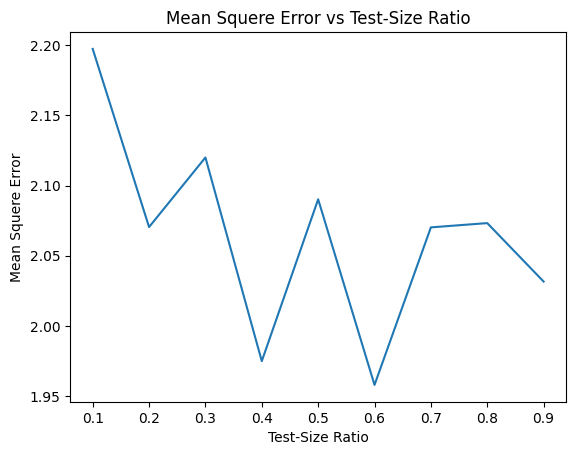

In [41]:
from sklearn.metrics import mean_squared_error

test_size_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
mse_scores = []

for test_size_ratio in test_size_ratios:
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=test_size_ratio)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

plt.plot(test_size_ratios, mse_scores)
plt.xlabel("Test-Size Ratio")
plt.ylabel("Mean Squere Error")
plt.title("Mean Squere Error vs Test-Size Ratio")
plt.show()


In [42]:
from itertools import combinations

def naive_k_feature_selection(X_train, y_train, X_test, y_test, k):
    # Find all possible combinations of k features
    feature_combinations = list(combinations(range(X_train.shape[1]), k))

    best_mse = float('inf')
    best_features = None

    for feature_set in feature_combinations:
        # Select the k features from the train and test sets
        X_train_selected = X_train[:, feature_set]
        X_test_selected = X_test[:, feature_set]

        # Train a linear regressor model on the train set with the k selected features
        lr = LinearRegression()
        lr.fit(X_train_selected, y_train)

        # Evaluate the model on the test set with the k selected features
        y_pred = lr.predict(X_test_selected)
        mse = mean_squared_error(y_test, y_pred)

        # Update the best MAE and best features if the current MAE is better
        if mse < best_mse:
            best_mse = mse
            best_features = feature_set

    return best_features, best_mse


In [45]:
# Assuming X and y are already fetched from the 529-pollen dataset
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

# Call the function for k=2 and k=3
best_features_k2, best_mae_k2 = naive_k_feature_selection(X_train, y_train, X_test, y_test, k=2)
best_features_k3, best_mae_k3 = naive_k_feature_selection(X_train, y_train, X_test, y_test, k=3)

# Print the results
print("For k=2, best features:", best_features_k2, ", mean Squere error:", best_mae_k2)
print("For k=3, best features:", best_features_k3, ", mean Squere error:", best_mae_k3)

For k=2, best features: (0, 3) , mean Squere error: 3.33980744936921
For k=3, best features: (0, 1, 3) , mean Squere error: 2.1832620736493342
